In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In [2]:
all_complaints = pd.read_csv('data/DOB_Complaints_Received.csv')
print(list(all_complaints))
print(len(all_complaints))

/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (4,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['Complaint Number', 'Status', 'Date Entered', 'House Number', 'ZIP Code', 'House Street', 'BIN', 'Community Board', 'Special District', 'Complaint Category', 'Unit', 'Disposition Date', 'Disposition Code', 'Inspection Date', 'DOBRunDate']
2299448


### Handle types

In [3]:
all_complaints['Complaint Category'] = all_complaints['Complaint Category'].astype(str)

### Filter down to just Boilers

In [4]:
# complaint_categories = ['58', '56', '82']
complaint_categories = ['58']

boiler_complaints = all_complaints[all_complaints['Complaint Category'].isin(complaint_categories)]

print("Number of total complaints: {}".format(len(all_complaints)))
print("Number of boiler complaints: {}".format(len(boiler_complaints)))

boiler_complaints['Complaint Category'].value_counts()

Number of total complaints: 2299448
Number of boiler complaints: 29745


58    29745
Name: Complaint Category, dtype: int64

### Filter down to relevant labels

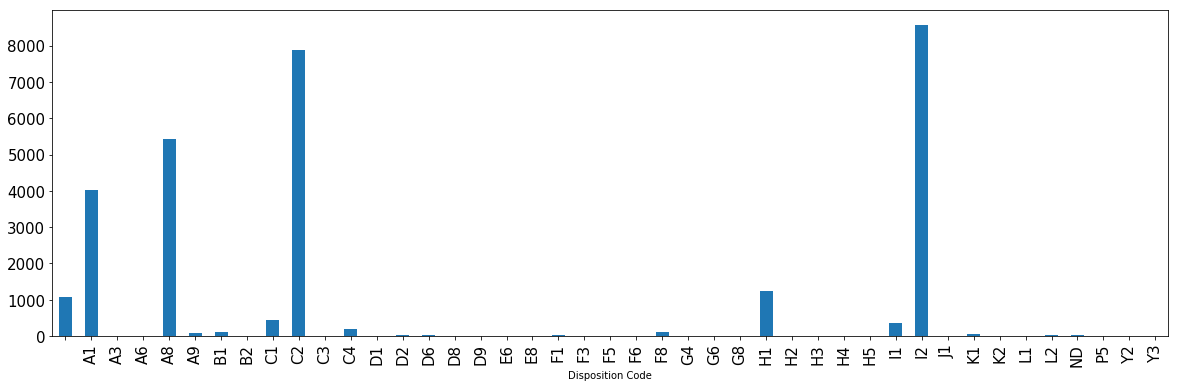

In [5]:
# print(boiler_complaints['Disposition Code'].value_counts())
boiler_complaints.groupby('Disposition Code').count()['BIN'].plot('bar', figsize=(20, 6), fontsize=15)

**Positive**: A8 (ECB Violation Served), A1 (Buildings Violation(s) Served), B1 (Buildings Violation(s) Prepared and Attempt to Serve will be Made)

**Negative**: I2 (No Violation Warranted for Complaint at Time of Inspection), I1 (Complaint Unsubstantiated Based on Department Records), 

**Note**: C2 (Inspector Unable to Gain Access – Final Attempt) did not include to assume we could gain access to the building.  It kind of seems like that would be a different classification task

## Number of Complaints that result in a violation

In [6]:
positive_labels = ['A1', 'A8', 'B1']
negative_labels = ['I1', 'I2']

boiler_positive = boiler_complaints[boiler_complaints['Disposition Code'].isin(positive_labels)]
boiler_negative = boiler_complaints[boiler_complaints['Disposition Code'].isin(negative_labels)]
boiler_c2 = boiler_complaints[boiler_complaints['Disposition Code'] == 'C2']

print("Percent of complaints that result in a violation {}".format(len(boiler_positive) / len(boiler_complaints)))
print("Percent of complaints that DO NOT result in a violation {}".format(len(boiler_negative) / len(boiler_complaints)))
print("Percent of complaints that result in a C2 {}".format(len(boiler_c2) / len(boiler_complaints)))

Percent of complaints that result in a violation 0.32217179357875275
Percent of complaints that DO NOT result in a violation 0.29957976130442093
Percent of complaints that result in a C2 0.2647167591191797


## Average response time (Date inspected - Date received) given violation

Convert to `datetime`

In [7]:
boiler_complaints['Date Entered'] = pd.to_datetime(boiler_complaints['Date Entered'])
boiler_complaints['Inspection Date'] = pd.to_datetime(boiler_complaints['Inspection Date'])

/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
boiler_complaints['Response Time'] = (boiler_complaints['Inspection Date'] - boiler_complaints['Date Entered']).dt.days
print("Length before response time clean: {}".format(len(boiler_complaints)))
boiler_complaints = boiler_complaints[boiler_complaints['Response Time'] >= 0]
print("Length after response time clean: {}".format(len(boiler_complaints)))
boiler_complaints.head()

Length before response time clean: 29745
Length after response time clean: 28397


/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Complaint Number,Status,Date Entered,House Number,ZIP Code,House Street,BIN,Community Board,Special District,Complaint Category,Unit,Disposition Date,Disposition Code,Inspection Date,DOBRunDate,Response Time
2084,1002232,CLOSED,1989-06-08,245,10009,EAST 2ND ST,1004584,103,,58,BOILR,01/09/1990,A1,1989-11-14,11/07/2018 12:00:00 AM,159.0
2094,1002242,CLOSED,1989-06-08,224,10128,EAST 89 STREET,1085225,108,,58,BOILR,11/17/1989,I2,1989-10-31,11/07/2018 12:00:00 AM,145.0
2883,1003104,CLOSED,1989-08-11,640,10031,RIVERSIDE DRIVE,1062326,109,,58,BOILR,01/04/1990,I2,1989-11-30,11/07/2018 12:00:00 AM,111.0
4670,1005028,CLOSED,1990-01-09,1693,10128,2 AVENUE,1048815,108,,58,BOILR,07/10/2002,I1,1990-01-16,11/07/2018 12:00:00 AM,7.0
4749,1005115,CLOSED,1990-01-17,216,10028,EAST 84 STREET,1048719,108,,58,BOILR,11/07/2002,C2,2002-08-27,11/07/2018 12:00:00 AM,4605.0


### Median Response Time

In [9]:
pos_label_response_time = boiler_complaints.groupby('Disposition Code').median()['Response Time'].loc[positive_labels]
neg_label_response_time = boiler_complaints.groupby('Disposition Code').median()['Response Time'].loc[negative_labels]

print("Median response time of complaints that result in violations \n{} \n{}".format( "-" * 40, pos_label_response_time))
print()
print("Median response time of complaints that DO NOT result in violations \n{} \n{}".format( "-" * 40, neg_label_response_time))

Median response time of complaints that result in violations 
---------------------------------------- 
Disposition Code
A1    31.0
A8    20.0
B1     2.5
Name: Response Time, dtype: float64

Median response time of complaints that DO NOT result in violations 
---------------------------------------- 
Disposition Code
I1    47.5
I2    27.0
Name: Response Time, dtype: float64


### Time interval response time

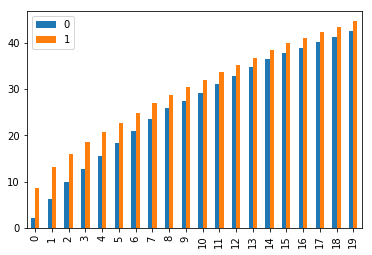

In [10]:
positive_complaints = boiler_complaints[boiler_complaints['Disposition Code'].isin(positive_labels)]
negative_complaints = boiler_complaints[boiler_complaints['Disposition Code'].isin(negative_labels)]

interval = 20
response_time = []

for i in range(interval):
    positive_within_interval = positive_complaints[positive_complaints['Response Time'] <= i]
    negative_within_interval = negative_complaints[negative_complaints['Response Time'] <= i]
    
    positive_pct = len(positive_within_interval) / len(positive_complaints) * 100
    negative_pct = len(negative_within_interval) / len(negative_complaints) * 100
    response_time.append([negative_pct, positive_pct])
    

pd.DataFrame(response_time).plot(kind='bar')
# plt.bar(response_time, height=10)
#     print("{}% of complaints that result in a violation are responded to within {} days.".format(len(positive_within_interval) / len(positive_complaints) * 100, interval))
#     print("{}% of complaints that DO NOT result in a violation are responded to within {} days.".format(len(negative_within_interval) / len(negative_complaints) * 100, interval))

Text(0, 0.5, 'Number of Complaints')

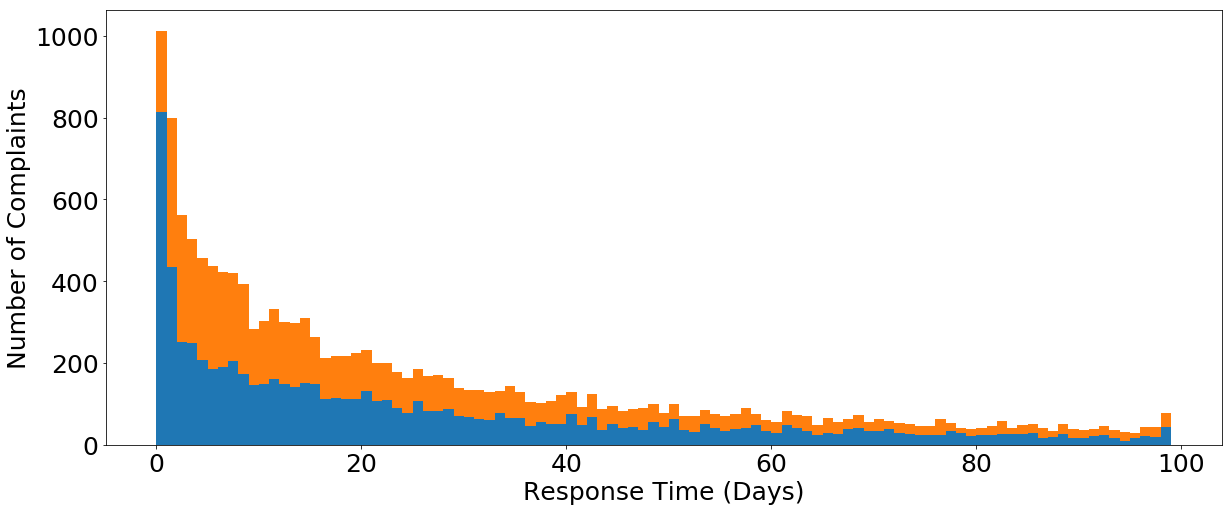

In [151]:
plt.figure(figsize=(20,8))

plt.rc('font', size=25)
plt.hist([positive_complaints['Response Time'], negative_complaints['Response Time']], stacked=True, bins=range(100))

plt.xlabel('Response Time (Days)')
plt.ylabel('Number of Complaints')

### What is the order / response time for a given day?

In [36]:
# pick out day with the most complaints, plot out order
boiler_complaints['Date Entered'].value_counts().head(20)

2007-02-15    53
2007-03-06    48
2007-01-11    46
2007-02-16    46
2007-01-22    41
2007-03-07    41
2019-01-31    40
2006-01-18    38
2006-12-15    37
2007-01-10    37
2012-12-27    35
2019-01-21    34
2016-08-04    34
2007-02-21    33
2006-12-04    33
2007-01-12    32
2007-01-02    32
2013-01-24    31
2007-03-15    30
2005-12-18    30
Name: Date Entered, dtype: int64

3


([array([2., 8., 0., 0., 0., 1., 0., 0., 0., 1.]),
  array([ 2., 11.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.])],
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 2 Lists of Patches objects>)

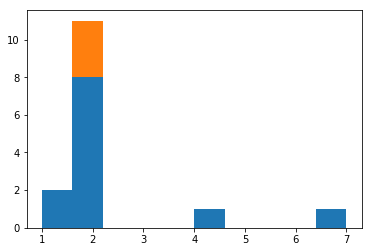

In [66]:
case_study = boiler_complaints[boiler_complaints['Date Entered'] == '2019-01-21'].sort_values(by='Response Time')

pos_case_study = case_study[case_study['Disposition Code'].isin(positive_labels)]
neg_case_study = case_study[case_study['Disposition Code'].isin(negative_labels)]

print(len(pos_case_study))

plt.hist([neg_case_study['Response Time'], pos_case_study['Response Time']], stacked=True)

In [109]:
from statistics import mean

def average_priority(s):
#     print(s)
    priorities = []
    for i, v in enumerate(s):
        if v:
            priorities.append(i)
#     print(priorities)
    if priorities == []:
        return None
    return mean(priorities)
            

In [120]:
cs = case_study.sort_values(by="Response Time")['Violation']
print(case_study.sort_values(by="Response Time"))
average_priority(cs)

         Complaint Number  Status Date Entered  House Number   ZIP Code  \
476436            1499672  CLOSED   2019-01-21  145           10019       
476441            1499674  CLOSED   2019-01-21  145           10019       
476452            1499680  CLOSED   2019-01-21  145           10019       
476516            1499713  CLOSED   2019-01-21  4646          10040       
2144615           4760912  CLOSED   2019-01-21  29-05             11101   
2144758           4760971  CLOSED   2019-01-21  141-68            11435   
476445            1499676  CLOSED   2019-01-21  145           10019       
476447            1499677  CLOSED   2019-01-21  145           10019       
476450            1499679  CLOSED   2019-01-21  145           10019       
476468            1499688  CLOSED   2019-01-21  145           10019       
476527            1499719  ACTIVE   2019-01-21  711           10009       
2144789           4760984  ACTIVE   2019-01-21  179-15            11365   
756766            2274714

7

assume response time is the team's scheduling

assume that prioritizing is done daily

how good is the team ordering? how good is our algorithms order?

what is good? prioritizing complaints that result in violations

(average priority of violation complaints for a given day)

# Average priority of violation complaints for a given day

In [107]:
boiler_complaints['Violation'] = boiler_complaints['Disposition Code'].isin(positive_labels)
boiler_complaints.head()

,Complaint Number,Status,Date Entered,House Number,ZIP Code,House Street,BIN,Community Board,Special District,Complaint Category,Unit,Disposition Date,Disposition Code,Inspection Date,DOBRunDate,Response Time,Violation
2084,1002232,CLOSED,1989-06-08,245,10009,EAST 2ND ST,1004584,103,,58,BOILR,01/09/1990,A1,1989-11-14,11/07/2018 12:00:00 AM,159.0,True
2094,1002242,CLOSED,1989-06-08,224,10128,EAST 89 STREET,1085225,108,,58,BOILR,11/17/1989,I2,1989-10-31,11/07/2018 12:00:00 AM,145.0,False
2883,1003104,CLOSED,1989-08-11,640,10031,RIVERSIDE DRIVE,1062326,109,,58,BOILR,01/04/1990,I2,1989-11-30,11/07/2018 12:00:00 AM,111.0,False
4670,1005028,CLOSED,1990-01-09,1693,10128,2 AVENUE,1048815,108,,58,BOILR,07/10/2002,I1,1990-01-16,11/07/2018 12:00:00 AM,7.0,False
4749,1005115,CLOSED,1990-01-17,216,10028,EAST 84 STREET,1048719,108,,58,BOILR,11/07/2002,C2,2002-08-27,11/07/2018 12:00:00 AM,4605.0,False


In [142]:
cs_priority = boiler_complaints.groupby('Date Entered').apply(lambda row: average_priority(row.sort_values(by='Response Time')['Violation']))

In [141]:
(~cs_priority.isna() * 1).sum() / len(cs_priority)

0.7022727272727273

(array([0.000e+00, 1.291e+03, 8.890e+02, 6.500e+02, 5.590e+02, 4.630e+02,
        3.690e+02, 3.230e+02, 2.330e+02, 1.750e+02, 1.450e+02, 1.170e+02,
        1.130e+02, 9.700e+01, 6.100e+01, 4.900e+01, 3.900e+01, 3.000e+01,
        2.100e+01, 1.800e+01, 1.300e+01, 1.000e+01, 3.000e+00, 3.000e+00,
        3.000e+00, 1.000e+01, 4.000e+00, 7.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

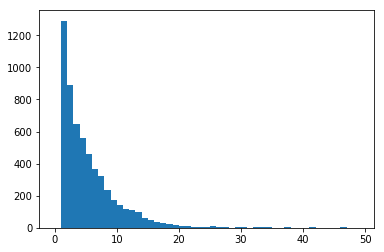

In [145]:
plt.hist(boiler_complaints.groupby('Date Entered').count()['BIN'], bins=range(50))

In [8]:

boiler_complaints = boiler_complaints[boiler_complaints['Disposition Code'].isin(positive_labels + negative_labels)]
print("Number of complaints after filter down to relevant dispoisition codes: {}".format(len(boiler_complaints)))

Number of complaints after filter down to relevant dispoisition codes: 17511


/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


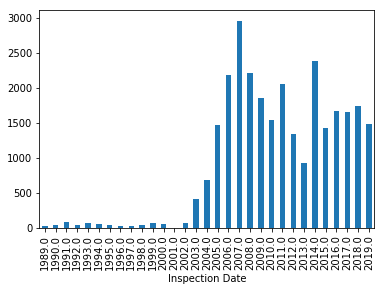

In [5]:
boiler_complaints['Inspection Date'] = pd.to_datetime(boiler_complaints['Inspection Date'])
boiler_complaints.groupby(boiler_complaints['Inspection Date'].dt.year).count()['BIN'].plot(kind='bar')

### Remove Duplicates

In [6]:
boiler_complaints = boiler_complaints.drop_duplicates(subset=['BIN', 'Date Entered'])
print("number of boiler complaints after dropping duplicates: {}".format(len(boiler_complaints)))

number of boiler complaints after dropping duplicates: 27690


# Create Labels

In [9]:
labels = boiler_complaints['Disposition Code'].isin(positive_labels) * 1

In [10]:
print("Percent of labels that are positive (result in violation): {}".format(sum(labels) / len(labels)))

Percent of labels that are positive (result in violation): 0.5244703329335846


# Create Features

In [11]:
features = pd.DataFrame()
features['Violation'] = labels
boiler_complaints['Violation'] = labels
features.head()

,Violation
2082,1
2083,0
2084,1
2094,0
2883,0


In [12]:
def violation_ratio_test(column):
    return features.groupby(column)['Violation'].sum() / features.groupby(column).count()['Violation']

### Boiler Category / Priority

In [13]:
boiler_complaints['Complaint Category'].value_counts()

58    17511
Name: Complaint Category, dtype: int64

In [14]:
boiler_complaints['Complaint Category'] = boiler_complaints['Complaint Category'].astype('category')
boiler_complaints['Complaint Category'] = boiler_complaints['Complaint Category'].cat.codes
features['Complaint Category'] = boiler_complaints['Complaint Category']

In [15]:
violation_ratio_test('Complaint Category')

Complaint Category
0    0.52447
Name: Violation, dtype: float64

### Number of previous boiler complaints

In [16]:
def get_previous_complaints(row):
    # Get all of complaings with same BIN
    # remove complaints with same complaint number
    # get total of violation (could even do violation ratio)
    bin_complaints = boiler_complaints[boiler_complaints['BIN'] == row['BIN']]
    bin_complaints = bin_complaints[boiler_complaints['Complaint Number'] != row['Complaint Number']]
    return len(bin_complaints)

In [17]:
features['Previous Complaints'] = boiler_complaints.apply(get_previous_complaints, axis=1 )

/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [18]:
features['Previous Complaints'].value_counts()

0     9114
1     3262
2     1635
3      836
4      505
5      312
6      308
7      200
9      170
8      135
10     132
13      98
40      82
14      75
73      74
22      69
66      67
12      65
11      60
51      52
16      51
19      40
36      37
17      36
26      27
25      26
21      22
20      21
Name: Previous Complaints, dtype: int64

In [19]:
violation_ratio_test('Previous Complaints')

Previous Complaints
0     0.543120
1     0.531576
2     0.560245
3     0.531100
4     0.499010
5     0.500000
6     0.542208
7     0.340000
8     0.503704
9     0.441176
10    0.416667
11    0.300000
12    0.523077
13    0.285714
14    0.440000
16    0.254902
17    0.222222
19    0.400000
20    0.047619
21    0.636364
22    0.492754
25    0.346154
26    0.296296
36    0.216216
40    0.256098
51    0.326923
66    0.283582
73    0.243243
Name: Violation, dtype: float64

In [20]:
# The less previous complaints a building has, the more likely it is the complaint will result in a violation

In [21]:
# Checking to make sure these aren't duplicate 
boiler_complaints[boiler_complaints['BIN'] == 1015102]

,Complaint Number,Status,Date Entered,House Number,ZIP Code,House Street,BIN,Community Board,Special District,Complaint Category,Unit,Disposition Date,Disposition Code,Inspection Date,DOBRunDate,Violation
127622,1134056,CLOSED,12/19/2004,139,10001,WEST 28 STREET,1015102,105,,0,BOILR,01/24/2005,I2,2005-01-18,11/07/2018 12:00:00 AM,0
181203,1190768,CLOSED,04/10/2007,139,10001,WEST 28 STREET,1015102,105,,0,BOILR,05/04/2007,A1,2007-04-27,11/07/2018 12:00:00 AM,1


### Number of previous boiler violations
TODO: might be better for this to come from the DOB Violation dataset?

Make sure current complaint is not included in the number of previous violations! (This would include the label in the features... yikes man)

In [22]:
def get_previous_violations(row):
    # Get all of complaings with same BIN
    # remove complaints with same complaint number
    # get total of violation (could even do violation ratio)
    bin_complaints = boiler_complaints[boiler_complaints['BIN'] == row['BIN']]
    bin_complaints = bin_complaints[bin_complaints['Violation'] == 1]
    bin_complaints = bin_complaints[boiler_complaints['Complaint Number'] != row['Complaint Number']]
    return len(bin_complaints)

In [23]:
# # get_previous_violations test
# for row in boiler_complaints.iterrows():
#     num_previous_complaints = get_previous_violations(row[1])
#     print(num_previous_complaints)
# #     break

In [24]:
features['Previous Violations'] = boiler_complaints.apply(get_previous_violations, axis=1 )

/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [25]:
features['Previous Violations'].value_counts()

0     11401
1      2899
2      1282
3       644
4       342
5       231
6       151
8       120
18       98
7        95
17       71
19       48
9        47
13       28
21       22
16       17
14       14
22        1
Name: Previous Violations, dtype: int64

In [26]:
violation_ratio_test('Previous Violations')

Previous Violations
0     0.511709
1     0.542256
2     0.641186
3     0.478261
4     0.599415
5     0.597403
6     0.463576
7     0.421053
8     0.525000
9     0.212766
13    1.000000
14    0.000000
16    1.000000
17    0.507042
18    0.193878
19    0.000000
21    1.000000
22    0.000000
Name: Violation, dtype: float64

### Number of previous boiler violations / complaints ratio

In [27]:
features['Violation Ratio'] = (features['Previous Violations'] / features['Previous Complaints']).fillna(0)
features.head()

,Violation,Complaint Category,Previous Complaints,Previous Violations,Violation Ratio
2082,1,0,0,0,0.000000
2083,0,0,3,2,0.666667
2084,1,0,0,0,0.000000
2094,0,0,0,0,0.000000
2883,0,0,1,1,1.000000


In [28]:
print(features['Violation Ratio'].value_counts())
violation_ratio_test('Violation Ratio')

0.000000    11401
1.000000     2677
0.500000      920
0.666667      416
0.333333      282
0.250000      156
0.750000      135
0.200000       90
0.600000       88
0.428571       72
0.285714       62
0.800000       61
0.400000       59
0.246575       56
0.222222       51
0.272727       48
0.287879       48
0.142857       47
0.833333       44
0.075000       38
0.375000       33
0.076923       28
0.444444       27
0.125000       27
0.571429       26
0.307692       24
0.050000       23
0.450000       23
0.625000       22
0.954545       22
            ...  
0.888889       11
0.181818       11
0.230769       11
0.777778       11
0.437500       10
0.714286        9
0.857143        9
0.615385        9
0.384615        9
0.320000        9
0.700000        8
0.363636        8
0.636364        8
0.269231        8
0.194444        8
0.461538        7
0.538462        7
0.642857        6
0.736842        6
0.416667        6
0.294118        6
0.583333        6
0.692308        5
0.727273        4
0.187500  

Violation Ratio
0.000000    0.511709
0.050000    0.130435
0.052632    1.000000
0.058824    1.000000
0.062500    1.000000
0.075000    0.000000
0.076923    0.071429
0.100000    1.000000
0.105263    0.000000
0.111111    0.181818
0.117647    0.000000
0.125000    0.148148
0.142857    0.255319
0.153846    0.200000
0.166667    0.368421
0.181818    1.000000
0.187500    1.000000
0.194444    1.000000
0.200000    0.177778
0.222222    0.117647
0.227273    0.000000
0.230769    0.000000
0.232877    1.000000
0.246575    0.000000
0.250000    0.301282
0.269231    1.000000
0.272727    0.625000
0.285714    0.419355
0.287879    0.000000
0.294118    1.000000
              ...   
0.444444    0.555556
0.450000    0.000000
0.461538    1.000000
0.500000    0.545652
0.538462    0.000000
0.555556    0.285714
0.571429    0.538462
0.583333    0.000000
0.600000    0.409091
0.615385    1.000000
0.619048    1.000000
0.625000    0.818182
0.636364    1.000000
0.642857    0.000000
0.666667    0.706731
0.684211    1.0000

In [29]:
features['ZIP Code'] = boiler_complaints['ZIP Code'].astype('category').cat.codes
features.head()

,Violation,Complaint Category,Previous Complaints,Previous Violations,Violation Ratio,ZIP Code
2082,1,0,0,0,0.000000,64
2083,0,0,3,2,0.666667,72
2084,1,0,0,0,0.000000,49
2094,0,0,0,0,0.000000,83
2883,0,0,1,1,1.000000,70


In [30]:
features['BIN'] = boiler_complaints['BIN'].astype('category').cat.codes
features.head()

,Violation,Complaint Category,Previous Complaints,Previous Violations,Violation Ratio,ZIP Code,BIN
2082,1,0,0,0,0.000000,64,1883
2083,0,0,3,2,0.666667,72,2636
2084,1,0,0,0,0.000000,49,108
2094,0,0,0,0,0.000000,83,3228
2883,0,0,1,1,1.000000,70,2405


In [67]:
boiler_complaints['Date Entered'] = pd.to_datetime(boiler_complaints['Date Entered'])

In [86]:
features['Day'] = boiler_complaints['Date Entered'].apply(lambda date: date.day)
features.head()

,Violation,Complaint Category,Previous Complaints,Previous Violations,Violation Ratio,ZIP Code,BIN,Boiler Make,Pressure Type,Defects,Month,Day
2082,1,0,0,0,0.0,64,1883,19,1,1.0,6,8
2084,1,0,0,0,0.0,49,108,121,1,1.0,6,8
2094,0,0,0,0,0.0,83,3228,40,1,1.0,6,8
2883,0,0,1,1,1.0,70,2405,13,1,2.0,8,11
4670,0,0,0,0,0.0,83,1441,4,1,5.0,1,9


# Boiler make

In [31]:
boiler_inspections = pd.read_csv('data/DOB_NOW_Boiler_Safety.csv')
list(boiler_inspections)

['Tracking Number',
 'Boiler ID',
 'Report Type',
 'ApplicantFirst Name',
 'Applicant Last Name',
 'Applicant License Type',
 'Applicant License Number',
 'Owner First Name',
 'Owner Last Name',
 'Boiler Make',
 'Boiler Model',
 'Pressure Type',
 'Inspection Type',
 'Inspection Date',
 'Defects Exist',
 'LFF (45 Days)',
 'LFF (180 Days)',
 'Filing Fee',
 'Total Amount Paid',
 'Report Status',
 'Bin Number']

### Drop nan Boiler makes

In [32]:
boiler_features = ['Boiler Make', 'Defects Exist', 'Pressure Type']

print(len(boiler_inspections))
boiler_inspections = boiler_inspections.dropna(subset=boiler_features)
print(len(boiler_inspections))

169583
162877


In [33]:
print("{} types of models".format(len(set(boiler_inspections['Boiler Model']))))
print("{} types of makes".format(len(set(boiler_inspections['Boiler Make']))))

14798 types of models
2247 types of makes


### Convert to to datetime

In [34]:
boiler_inspections['Inspection Date'] = pd.to_datetime(boiler_inspections['Inspection Date'])
boiler_inspections['Defects Exist'] = boiler_inspections['Defects Exist'].map({'Yes': 1, 'No':0})

### Clean boiler makes

In [35]:
from difflib import SequenceMatcher

def similarity(a, b):
#     print(a)
#     print(b)
#     print()
    return SequenceMatcher(None, a, b).ratio()

In [36]:
print("[similarity()] tests")
print(similarity('LOCH-CERST', 'LOCH-CREST'))
print(similarity('WEIL MCLAIN', 'BEST'))
print(similarity('H B SMITH NEW', 'SMITH    H'))
print()
# create maping of a make to the other spellings
makes = {}

for make in set(boiler_inspections['Boiler Make']):
    # is there something similar in the set of keys? if so put it in the values, if not, create a new key
#     print(f"looking at {make}")
    threshold = 0.6
    found_key = ''
    
    for key in makes.keys():
        sim = similarity(key, make)
        if sim >= threshold:
            found_key = key
            break
        else:
            continue
    
    if found_key != '':
#         print(found_key)
        makes[found_key].append(make)
    else:
        makes[make] = [make]
#     print(makes)

[similarity()] tests
0.9
0.13333333333333333
0.5217391304347826



In [37]:
print(len(makes.keys()))
# invert the mapping
inverted_makes = {}

for make_key, make_values in makes.items():
    for m in make_values:
        inverted_makes[m] = make_key
        
inverted_makes

435


{'SLANTEIN': 'SLANTEIN',
 'SLANT FIN VIC': 'SLANTEIN',
 'SLANTFIN SX-1': 'SLANTEIN',
 'SLANTFI': 'SLANTEIN',
 'SLNT FIN': 'SLANTEIN',
 'SLANT FINN': 'SLANTEIN',
 'SLANT/FIN CAR': 'SLANTEIN',
 'SLINTFIN': 'SLANTEIN',
 'NLANT FIN': 'SLANTEIN',
 'SLANFIN': 'SLANTEIN',
 'SNANT FIN': 'SLANTEIN',
 'SLANT FINN GG': 'SLANTEIN',
 'SLANT-FIN': 'SLANTEIN',
 'SLANT FN': 'SLANTEIN',
 'SLANTFIN GGT-': 'SLANTEIN',
 'SLANT/FI': 'SLANTEIN',
 'SLANT FIN/HYDRO': 'SLANTEIN',
 'SLANTFINN': 'SLANTEIN',
 'SLANT/FINN': 'SLANTEIN',
 'SLANF FIN': 'SLANTEIN',
 '8LANTEIN': 'SLANTEIN',
 'SLANTFIN': 'SLANTEIN',
 'SLANT FI': 'SLANTEIN',
 'SLAN FINT': 'SLANTEIN',
 'SLANT FIN GX': 'SLANTEIN',
 'SLANTF FIN': 'SLANTEIN',
 'SLANT  FIN': 'SLANTEIN',
 'SLANT FINM': 'SLANTEIN',
 'SLAN FIN': 'SLANTEIN',
 'SLANTFINN GXH': 'SLANTEIN',
 'SLANTFIN INTERA': 'SLANTEIN',
 'SLANT FIN GAL': 'SLANTEIN',
 'SALNTFIN': 'SLANTEIN',
 'SLANT': 'SLANTEIN',
 'SLAINT FIN': 'SLANTEIN',
 'STATE': 'SLANTEIN',
 'ATLANTIC': 'SLANTEIN',
 'SLANTFIN G

In [38]:
# complete the mapping
boiler_inspections['Boiler Make'] = boiler_inspections['Boiler Make'].map(inverted_makes)

### Question: What are the most popular boilers?

In [39]:
top_makes = boiler_inspections.groupby('Boiler Make').count().sort_values(by='Bin Number', ascending=False)['Tracking Number'].head()
top_makes

Boiler Make
W.MCLAIN            32713
FEDERAL PLW 53HW    17583
BURNHAM 1N-4        14385
HB SMITH 28A7       12159
ROCKMILLS MP100     11021
Name: Tracking Number, dtype: int64

### Question: Which boiler makes have the highest rate of defects?

In [40]:
boiler_make_numerator = boiler_inspections.groupby('Boiler Make').sum()['Defects Exist']

boiler_make_denominator = boiler_inspections.groupby('Boiler Make').count()['Boiler ID']

defect_make_ratio = boiler_make_numerator / boiler_make_denominator

In [41]:
# of the top 5 boilers, which are the most defective?
for make in top_makes.index:
    print("Make: {} ---- defect ratio: {}".format(make, defect_make_ratio[make]))
    print()

Make: W.MCLAIN ---- defect ratio: 0.0755357197444441

Make: FEDERAL PLW 53HW ---- defect ratio: 0.09964169936870841

Make: BURNHAM 1N-4 ---- defect ratio: 0.06506777893639208

Make: HB SMITH 28A7 ---- defect ratio: 0.09819886503824328

Make: ROCKMILLS MP100 ---- defect ratio: 0.09173396243535069



In [42]:
boiler_inspections.groupby('Bin Number').count()['Tracking Number'].sort_values(ascending=False)

Bin Number
3071219    195
1088437    102
4112321     80
4092120     74
3347532     72
2116700     65
4539231     64
1008455     53
5009578     52
1082174     45
2005898     45
2097050     44
5147163     43
3056457     42
1089325     42
1014497     41
1080776     38
1014464     36
4004351     36
3189540     35
3014856     35
3061080     34
5113197     34
1048914     33
1070992     33
1088726     32
2051208     32
1054368     32
2117693     32
3062358     31
          ... 
2000864      1
2000865      1
2000866      1
3135868      1
2000732      1
2000731      1
3135918      1
3136011      1
2000602      1
3135956      1
3135955      1
2000606      1
3135952      1
2000610      1
3135946      1
2000613      1
2000614      1
2000643      1
2000704      1
2000656      1
3135917      1
2000669      1
2000672      1
3135912      1
3135908      1
3135905      1
2000684      1
3135902      1
2000690      1
3037511      1
Name: Tracking Number, Length: 70531, dtype: int64

### Bin to boiler features

In [43]:
def bin_to_boiler(bn):
    """ Returns the most recent boiler information for a given Bin.  None if no records."""
    return boiler_inspections[boiler_inspections['Bin Number'] == bn].sort_values(by='Inspection Date', ascending=False).head(1)

In [44]:
bin_to_boiler(3071219)

,Tracking Number,Boiler ID,Report Type,ApplicantFirst Name,Applicant Last Name,Applicant License Type,Applicant License Number,Owner First Name,Owner Last Name,Boiler Make,...,Pressure Type,Inspection Type,Inspection Date,Defects Exist,LFF (45 Days),LFF (180 Days),Filing Fee,Total Amount Paid,Report Status,Bin Number
164033,2019-30000103737N0001-168469,30000103737N0001,Initial,CRAIG,MUELLER,BB,5029.0,LARRY,MOSKOWITZ,YORK SHIPLEY,...,High Pressure,Internal,2019-04-09,0,0,0,30,30,Accepted,3071219


In [45]:
# TODO: change this to get all relevant boiler features
# boiler_feature_names = ['Pressure Type', 'Boiler Make']

def get_boiler_feature(feature):
    boiler_features = []
    for row in boiler_complaints.iterrows():
        boiler_info = bin_to_boiler(row[1]['BIN'])
        
        boiler_feature = boiler_info[feature].values
#         boiler_features.append(boiler_feature)
        
        if len(boiler_feature) > 0:
            boiler_features.append(boiler_feature[0])
#             print(boiler_feature[0])
    #         print(type(boiler_info))
#             break
        else:
            boiler_features.append(None)
    #         print(len(boiler_features))

#     #     index = boiler_complaints.index[boiler_complaints['BIN'] == row[1]['BIN']].values[0]

    return boiler_features

In [46]:
features['Boiler Make'] = get_boiler_feature('Boiler Make')
features['Pressure Type'] = get_boiler_feature('Pressure Type')
print(features['Boiler Make'].head())

2082        BURNHAM 1N-4
2083                None
2084            W.MCLAIN
2094    FEDERAL PLW 53HW
2883           BEST BLRS
Name: Boiler Make, dtype: object


In [47]:
features_with_boiler_features = features.dropna(subset=['Boiler Make'])

print("Percent of complaints with boiler features: {}".format(len(features_with_boiler_features) / len(features)))

print("Percent of complaints with boiler features that result in a violation (balance): {}".format(features_with_boiler_features['Violation'].sum() / len(features_with_boiler_features)))

Percent of complaints with boiler features: 0.6222374507452458
Percent of complaints with boiler features that result in a violation (balance): 0.5190895741556535


### Get number of previous defects

In [48]:
bin_to_defects = boiler_inspections.groupby('Bin Number').count()['Defects Exist']
defects_column = []
for row in boiler_complaints.iterrows():
    try:
        defects = bin_to_defects[row[1]['BIN']]
    except:
        defects = None
        
    defects_column.append(defects)

In [49]:
features['Defects'] = defects_column

In [50]:
features = features.dropna(subset=['Boiler Make'])
features['Boiler Make'] = features['Boiler Make'].astype('category').cat.codes
features['Pressure Type'] = features['Pressure Type'].astype('category').cat.codes
features.head()

,Violation,Complaint Category,Previous Complaints,Previous Violations,Violation Ratio,ZIP Code,BIN,Boiler Make,Pressure Type,Defects
2082,1,0,0,0,0.0,64,1883,19,1,1.0
2084,1,0,0,0,0.0,49,108,121,1,1.0
2094,0,0,0,0,0.0,83,3228,40,1,1.0
2883,0,0,1,1,1.0,70,2405,13,1,2.0
4670,0,0,0,0,0.0,83,1441,4,1,5.0


In [51]:
len(set(features['Boiler Make']))

129

# Model

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [80]:
list(features)

['Violation',
 'Complaint Category',
 'Previous Complaints',
 'Previous Violations',
 'Violation Ratio',
 'ZIP Code',
 'BIN',
 'Boiler Make',
 'Pressure Type',
 'Defects',
 'Month',
 'Day']

### Create Training and test splits

In [87]:
y = features['Violation']
X = features[['Violation Ratio', 'ZIP Code', 'Boiler Make', 'Previous Violations', 'Previous Complaints', 'Defects', 'BIN', 'Day']]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=None)
print(len(X_train))
print(len(X_test))

4358
6538


In [89]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=None)
clf.fit(X_train, y_train)

print(list(X))
print(clf.feature_importances_)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
feature_importances = pd.DataFrame(clf.feature_importances_, list(X))
feature_importances

['Violation Ratio', 'ZIP Code', 'Boiler Make', 'Previous Violations', 'Previous Complaints', 'Defects', 'BIN', 'Day']
[0.17 0.15 0.09 0.1  0.16 0.06 0.19 0.08]
0.6826525929325379
0.6217497705720404


,0
Violation Ratio,0.174175
ZIP Code,0.154231
Boiler Make,0.085331
Previous Violations,0.102357
Previous Complaints,0.163046
Defects,0.055085
BIN,0.185840
Day,0.079935


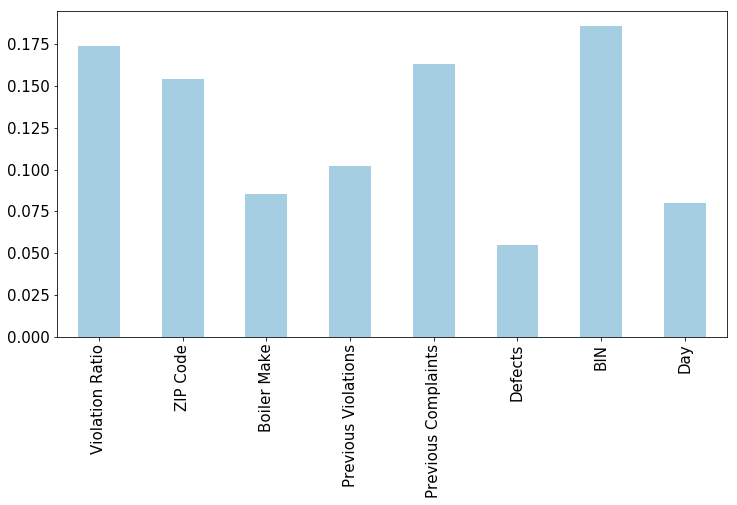

In [90]:
feature_importances.plot(kind='bar', legend=False, colormap='Paired', stacked=True, figsize=(12,6), fontsize=15)

# Metrics

In [85]:
# Playing with n_estimators and max_depth improves metrics

In [59]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.utils.multiclass import unique_labels

### ROC Curve

[0 1]
[[0.3510322  0.6489678 ]
 [0.23562707 0.76437293]
 [0.57529043 0.42470957]
 ...
 [0.33335147 0.66664853]
 [0.51027481 0.48972519]
 [0.41438313 0.58561687]]


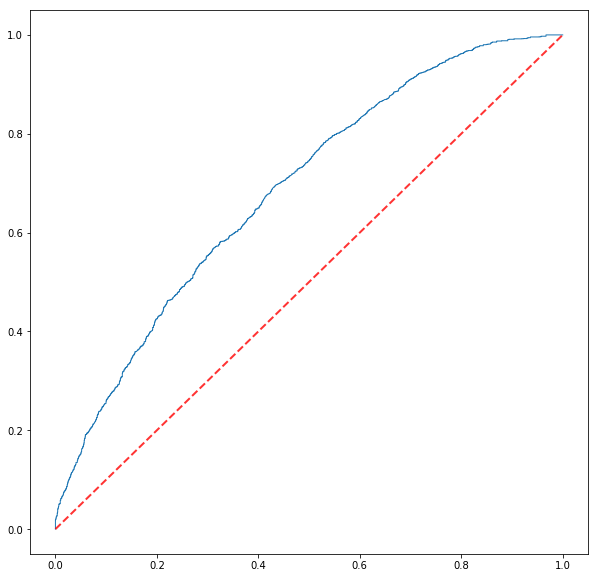

In [60]:
y_predict_probs = clf.predict_proba(X_test)
y_preds = clf.predict(X_test)
print(clf.classes_)
print(y_predict_probs)

fpr, tpr, thresholds = roc_curve(y_test, y_predict_probs[:,1])

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,10))

plt.plot(fpr, tpr, lw=1, alpha=1,
         label='ROC')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

[0 1]
Confusion matrix, without normalization
[[1895 1261]
 [1185 2197]]
0.5
[0 1]
Normalized confusion matrix
[[0.6  0.4 ]
 [0.35 0.65]]
0.5


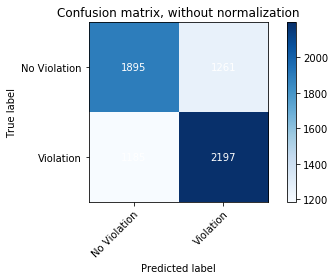

<Figure size 1080x1080 with 0 Axes>

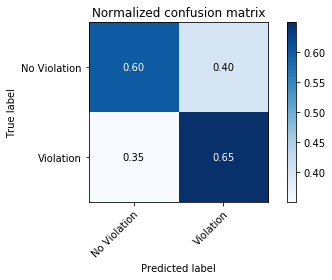

<Figure size 1080x1080 with 0 Axes>

In [61]:
# Code frome: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    print(unique_labels(y_true, y_pred))
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    plt.figure(figsize=(15,15))
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
    thresh = 0.5
    print(thresh)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = ['No Violation', 'Violation']

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_preds, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_preds, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [62]:
# Most confident predictions
sorted(y_predict_probs[:,1])[::-1]

[0.9199180258136677,
 0.9199180258136677,
 0.9199180258136677,
 0.9199180258136677,
 0.9199180258136677,
 0.9199180258136677,
 0.9199180258136677,
 0.9199180258136677,
 0.9199180258136677,
 0.9199180258136677,
 0.9199180258136677,
 0.9199180258136677,
 0.863815850034262,
 0.863815850034262,
 0.863815850034262,
 0.863815850034262,
 0.8194921664286796,
 0.8194921664286796,
 0.7960267587014839,
 0.7960267587014839,
 0.7960267587014839,
 0.7960267587014839,
 0.7947543378201092,
 0.7910655828159053,
 0.7910655828159053,
 0.7910655828159053,
 0.7910655828159053,
 0.7910655828159053,
 0.7910655828159053,
 0.7910655828159053,
 0.7910655828159053,
 0.7910655828159053,
 0.7867337230917769,
 0.7760296877290163,
 0.7760296877290163,
 0.7760296877290163,
 0.7757971251272995,
 0.7750937296265374,
 0.7696542925897508,
 0.768548703378385,
 0.7681241156175485,
 0.7681241156175485,
 0.7681241156175485,
 0.7681241156175485,
 0.7681241156175485,
 0.7681241156175485,
 0.7681241156175485,
 0.767330416547749